<a href="https://colab.research.google.com/github/pablex72/tensorflow-practices/blob/main/regresion_logistica_en_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importaciones**

In [1]:
# Set de datos: estudiantes que aprobaron (1) o reprobaron (0) el examen
# con base en el número de horas estudiadas (x1) y el número de horas
# de sueño (x2)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

**Leer datos y representacion**

In [3]:
#
# Leer el dataset y dibujar la nube de puntos con categorías
#

datos = pd.read_csv('/content/dataset.csv', sep=",")
print(datos)

    Horas de estudio  Horas de sueno  Categoria
0           4.855064        9.639962          1
1           8.625440        0.058927          0
2           3.828192        0.723199          0
3           7.150955        3.899420          1
4           6.477900        8.198181          1
..               ...             ...        ...
95          0.022280        2.658428          0
96          7.630637        7.405351          1
97          3.684997        5.049965          0
98          7.484260        6.059396          1
99          2.030708        3.937267          0

[100 rows x 3 columns]


In [20]:
# Crear datos de entrenamiento (X) y categorías de salida (Y). X: las
# dos primeras columnas, Y: la tercera columna

X = datos.values[:,0:2]
Y = datos.values[:,2]

# Graficar
idx0 = np.where(Y==0)
idx1 = np.where(Y==1)

X

array([[4.85506424, 9.63996157],
       [8.62543976, 0.05892653],
       [3.82819154, 0.72319923],
       [7.15095484, 3.89942042],
       [6.47790044, 8.19818055],
       [1.9222695 , 1.33142727],
       [8.97821589, 0.99343751],
       [6.63560308, 8.54280268],
       [7.67235895, 5.4163998 ],
       [4.86601533, 2.04267129],
       [6.86140497, 9.65530971],
       [8.54042132, 2.59037423],
       [3.71788065, 5.38166212],
       [9.18129712, 0.17147465],
       [9.56014002, 0.02494649],
       [5.97136947, 4.18830187],
       [9.43820269, 1.94381244],
       [4.35755102, 9.88798331],
       [4.54033196, 6.71387336],
       [1.54910163, 9.37513216],
       [8.08197371, 9.84220681],
       [9.620465  , 2.09932754],
       [8.83477098, 3.15220412],
       [1.75344854, 4.2192426 ],
       [1.04321284, 2.60976512],
       [1.19638318, 7.47574486],
       [8.91006988, 8.23292794],
       [4.52961874, 4.90551154],
       [1.85911242, 5.69186756],
       [9.55717884, 1.64467191],
       [7.

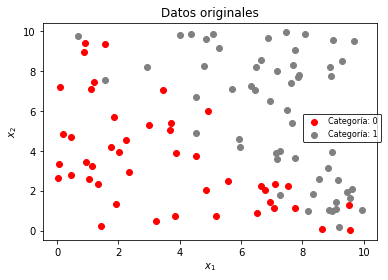

In [11]:
plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Categoría: 0')
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Categoría: 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')
plt.title('Datos originales')
plt.show()

**CREAR MODELO EN KERAS**

In [29]:
# - input_dim: 2, pues cada dato tiene 2 características (x1 y x2)
# - output_dim: 1, pues se tiene una de dos posibles categorías (0 ó 1)
# - Activación: sigmoidal

np.random.seed(1)       # para reproducibilidad
input_dim = X.shape[1] # gives the first element in that tuple
output_dim = 1                          

modelo = Sequential()
modelo.add(Dense(output_dim, input_dim = input_dim, activation='sigmoid'))

**COMPILACION**: Optimizacion

In [30]:
# Optimización: se usará gradiente descendente (SGD) con lr=0.2, función de error entropía
# cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión)

sgd = SGD(lr=0.2)
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**ENTRENAMIENTO**

In [31]:
num_epochs = 1000
batch_size = X.shape[0]
historia = modelo.fit(X, Y, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/1000
1/1 - 2s - loss: 1.6615 - accuracy: 0.6500 - 2s/epoch - 2s/step
Epoch 2/1000
1/1 - 0s - loss: 1.2270 - accuracy: 0.6800 - 11ms/epoch - 11ms/step
Epoch 3/1000
1/1 - 0s - loss: 1.0357 - accuracy: 0.6600 - 9ms/epoch - 9ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.8997 - accuracy: 0.6700 - 10ms/epoch - 10ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.7851 - accuracy: 0.6700 - 13ms/epoch - 13ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.6980 - accuracy: 0.6900 - 10ms/epoch - 10ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.6416 - accuracy: 0.7000 - 10ms/epoch - 10ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.6112 - accuracy: 0.6900 - 13ms/epoch - 13ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.5972 - accuracy: 0.6900 - 11ms/epoch - 11ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.5907 - accuracy: 0.6900 - 11ms/epoch - 11ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.5869 - accuracy: 0.6500 - 11ms/epoch - 11ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.5842 - accuracy: 0.6600 - 9ms/epoch - 9ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.

**RESULTADOS GRAFICA**

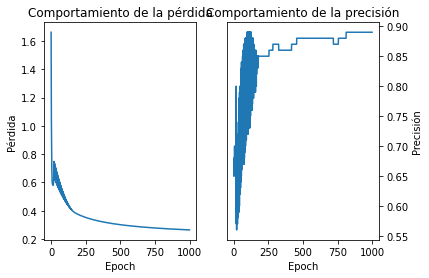

In [33]:
# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')

ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

plt.show()

37333/37333 [==============================] - 55s 1ms/step


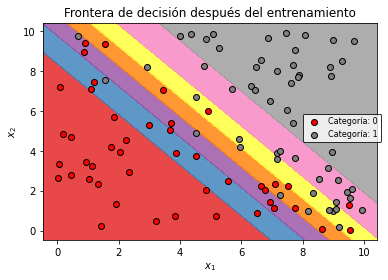

In [35]:
def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Categoría: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Categoría: 1')
    plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

dibujar_frontera(X,Y,modelo,'Frontera de decisión después del entrenamiento')